ChEn-3170: Computational Methods in Chemical Engineering Spring 2022 UMass Lowell; Prof. V. F. de Almeida **11Apr22**

# Laboratory Work 07 (11Apr22)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <font color="red">Guidance:</font>

+  <font color="red"> 
    Save your work frequently to a file locally to your computer.
   </font>
+  <font color="red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<font color="red">, to verify your notebook runs correctly.
   </font>
+  <font color="red">
    Save your file again.
   </font>
+  <font color="red">
    Upload the notebook file in the Blackboard submission portal as: 
   </font> 
   
   **lastname-firstname-labwork-xx.ipynb**
   
   NB: Please note lowercase.

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (100 pts)](#a1) CSTR.
 - [1.1)](#a11)(5 pts) Governing equations.
 - [1.2)](#a12)(20 pts) Steady state.
 - [1.3)](#a13)(20 pts) Heating rates.
 - [1.4)](#a14)(20 pts) Heating cost.
 - [1.5)](#a15)(20 pts) Transient and new steady state.
 - [1.6)](#a16)(10 pts) Comparison of SS and analysis.
* [Assignment 2 (5 pts)](#a2) Unclear points.
---

## [<font color="blue">Assignment 1 (100 pts)</font>](#toa)<a id="a1"></a>

### <span style="color:blue"> Irreversible first-order endothermic/exothermic reactions</span>

<span style="color:blue">
\begin{align*}
\text{A} &\overset{k_1}{\longrightarrow} 2\,\text{B} + 0.25\,\text{C} \\
\text{A} + 0.5 \,\text{B} &\overset{k_2}{\longrightarrow} \text{C} 
\end{align*}
</span>

### <span style="color:blue"> are performed in a continuous-stirred-tank reactor (CSTR; sketch below). A feed stream containing reactant A enters the constant volume CSTR at a mass flow rate $w$, temperature $T_\text{in}$ and molar concentration $c_\text{Ain}$; there is no B or C products in the inflow. The product stream leaves the reactor at a mass flow rate $w$, temperature $T$, and molar concentration $c_\text{A}$ for the reactant and $c_\text{B}$, $c_\text{C}$ for the products. The heating power addition rate to the CSTR is $\dot{Q}$, the experimental reaction rates density for the reactions are
</span>

<span style="color:blue">
\begin{align*}
r_1 &= k_1\,c^\alpha_\text{A}  , \\
r_2 &= k_2\,c^\gamma_\text{A}\,c^\beta_\text{B}   
\end{align*}
</span>

### <span style="color:blue"> where the rate constants are equal to the Arrhenius equations: $k_i = k_{0_i}\,\exp(\frac{-E}{R\,T})$. Additional parameters for the system are listed below.
</span>
 
 ![](images/cstr.png)

## <span style="color:blue"> Input Data</span><a id="data"></a>

|Name                      | Parameter          | Value                | Unit              |
|:-------------------------|:------------------:|:--------------------:|:-----------------:| 
|mass flow rate            | $w$                | 10                   | kg/s              | 
|inflow concentration of A | $c_\text{Ain}$     | 1.2                  | kgmol/$\text{m}^3$| 
|inflow concentration of B | $c_\text{Bin}$     | 0.0                  | kgmol/$\text{m}^3$| 
|inflow concentration of C | $c_\text{Cin}$     | 0.0                  | kgmol/$\text{m}^3$| 
|inflow temperature        | $T_\text{in}$      | 425                  | K                 | 
|holdup volume             | $V$                | 0.2                  | $\text{m}^3$      | 
|mass density              | $\rho$             | 1000                 | kg/$\text{m}^3$   |
|heat capacity             | $C$                | 4184                 | J/(kg K)          |
|heat of reaction          | $\Delta H_{\text{R}_1}$| $6.69 \times 10^8$   | J/kgmol           |
|heat of reaction          | $\Delta H_{\text{R}_2}$| $-6.69 \times 10^7$   | J/kgmol           |
|Arrhenius frequency       | $k_{0_1}$          | $1.97\times 10^{24}$ | $\text{s}^{-1}$   |
|Arrhenius frequency       | $k_{0_2}$          | $1.97\times 10^{23}$ | $\text{s}^{-1}$   |
|activation temperature    | $E/R$              | 20000                | K                 |
|reaction order            | $\alpha$           | 1.13                 |                   |
|reverse reaction order    | $\beta$            | 0.28                 |                   |
|reverse reaction order    | $\gamma$           | 0.12                 |                   |
|S.S. reactor temperature  | $T_\text{ss}$      | 350                  | K                 |

In [1]:
'''Parameters'''

w_flow          =   10.0      # kg/s
c_a_in          =   1.5       # kgmol/m^3
c_b_in          =   0.0       # kgmol/m^3
c_c_in          =   0.0       # kgmol/m^3
temp_in         =   425.0     # K
volume          =   0.2       # m^3
rho             =   1000.0    # kg/m^3
heat_capacity   =   4184.0    # J/kg/K
enthalpy_rxn_1  =   6.69e8    # J/kgmol
enthalpy_rxn_2  =  -6.69e7    # J/kgmol
k_0_1           =   1.97e24   # 1/s
k_0_2           =   1.97e23   # 1/s
energy_a_over_r =   20000.0   # K
alpha           =   1.13      #
beta            =   0.48      #
gamma           =   1.12      #
temp_ss         =   350.0     # K

In [2]:
'''Parameters dictionary'''

params = dict()

params['w_flow']          =   w_flow
params['c_a_in']          =   c_a_in
params['c_b_in']          =   c_b_in
params['c_c_in']          =   c_c_in
params['temp_in']         =   temp_in
params['volume']          =   volume
params['rho']             =   rho
params['heat_capacity']   =   heat_capacity
params['enthalpy_rxn_1']  =   enthalpy_rxn_1
params['enthalpy_rxn_2']  =   enthalpy_rxn_2
params['k_0_1']           =   k_0_1
params['k_0_2']           =   k_0_2
params['energy_a_over_r'] =   energy_a_over_r
params['alpha']           =   alpha
params['beta']            =   beta
params['gamma']           =   gamma
params['temp_ss']         =   temp_ss

q_flow = w_flow/rho
params['q_flow'] = q_flow
params['tau'] = volume/q_flow

### <span style="color:blue">[1.1)](#toa)(5 pts) Derive a dynamic model for the CSTR to determine the concentrations of reactant A and product B, and the CSTR temperature as a function of time.</span><a id="a11"></a>

### Species Mole Balance<a id="smb"></a>

### Energy balance<a id="eb"></a>

### <span style="color:blue">[1.2)](#toa)(20 pts) Determine the steady-state effluent concentrations for reactant A and products B and C.</span><a id="a12"></a>

In [10]:
'''Steady state concentration'''



c_a_ss = 0.22482 kgmol/m^3
c_b_ss = 2.14335 kgmol/m^3
c_c_ss = 0.44089 kgmol/m^3


### <span style="color:blue">[1.3)](#toa)(20 pts) Calculate the required coil heating power in MW for the above conditions. Calculate the chemical heating power in MW and compare to the coil heating rate; explain the difference.</span><a id="a13"></a>

In [11]:
'''Steady-state coil power'''


Coil heating power (SS) = 4.19487 [MW]


In [12]:
'''Steady state chemical heating power'''


Chemical heating power (SS) = -7.33287 [MW]


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.4)](#toa)(20 pts) If the cost of 1 kWh of electricity in Massachusetts is 22.57 cents, calculate the cost of running the reactor (if heated by electricity) for 1 hour. If the reactor is profitable only at steady state, is one hour a reasonable time to make a profit? Explain.</span><a id="a14"></a>

In [13]:
'''Cost of running the reactor for 1 hour'''


Electricity cost to run reactor for 1 hour = $946.78


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.5)](#toa)(20 pts) Using the above steady state condition as an initial condition of the reactor, and keeping the same external heating power, compute the history of the state of the reactor when a change in the inflow stream is made as follows: $c_A = 1.3$ kgmol/cc (lower concentration) $T_\text{in} = 450$ K (higher inflow temperature). Provide a tabular result and a plot as below up to a time when a new steady state has been reached. Explain the transient behavior of the system. What is the probable engineering intention of the new inflow condition?</span><a id="a15"></a>

In [16]:
'''Evolve the CSTR'''


       Time [s]    c_A [kgmol/m^3]  c_B [kgmol/m^3]  c_C[kgmol/m^3]   T [K]
      0.000e+00       2.248e-01       2.143e+00       4.409e-01       3.500e+02
      3.015e+00       1.846e-01       2.164e+00       4.452e-01       3.518e+02
      6.030e+00       1.490e-01       2.183e+00       4.493e-01       3.533e+02
      9.045e+00       1.199e-01       2.196e+00       4.524e-01       3.548e+02
      1.206e+01       9.637e-02       2.205e+00       4.547e-01       3.563e+02
      1.508e+01       7.762e-02       2.210e+00       4.561e-01       3.578e+02
      1.809e+01       6.282e-02       2.211e+00       4.570e-01       3.593e+02
      2.111e+01       5.127e-02       2.211e+00       4.573e-01       3.607e+02
      2.412e+01       4.230e-02       2.209e+00       4.573e-01       3.621e+02
      2.714e+01       3.538e-02       2.205e+00       4.571e-01       3.634e+02
      3.015e+01       3.003e-02       2.202e+00       4.566e-01       3.646e+02
      3.317e+01       2.588e-02       2.197e

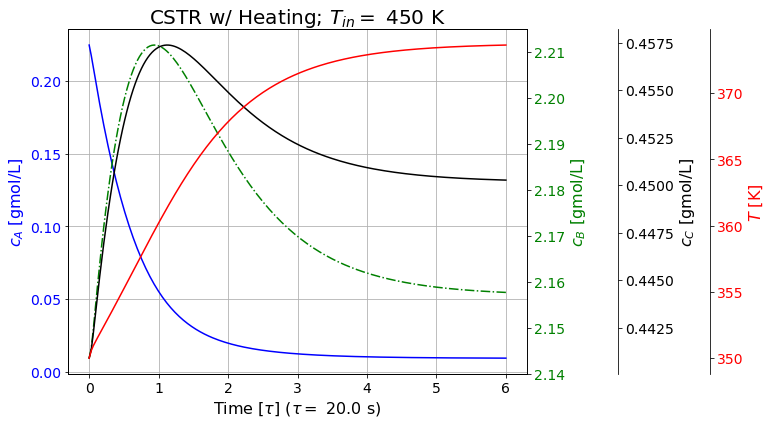

In [17]:
'''Plot Concentration versus Time'''


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.6)](#toa)(10 pts) Make a tabular comparison of the two steady states previously computed and analyze the results.</span><a id="a16"></a>

#### **Steady-state results analysis:**

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>